# Plot mask all cells

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from cellpose import plot
from cellpose import io
from skimage.segmentation import find_boundaries
from skimage.measure import label, regionprops
from skimage import segmentation, color

In [3]:
mask = io.imread('example_data/Patient2_002.tiff')

In [4]:
img_overlay = io.imread('example_data/Patient2_002_overlay.tiff')

## plot cancer and tissue mask
Stroma is defined as tissue area minus cancer area

In [5]:
tissue_mask = io.imread('example_data/Patient2_002_tissue_mask.tiff')
cancer_mask= io.imread('example_data/Patient2_002_cancer_mask.tiff')

In [5]:
def export_outline(img, mask, color = [0,0,255], output_file = None):
    #mask = io.imread(mask_tiff)
    #img = io.imread(img_tiff)
    outline = plot.outline_view(img,mask,color=color, mode='inner')
    plt.imshow(outline)
    plt.show()
    #return outline
    io.imsave(output_file, outline)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


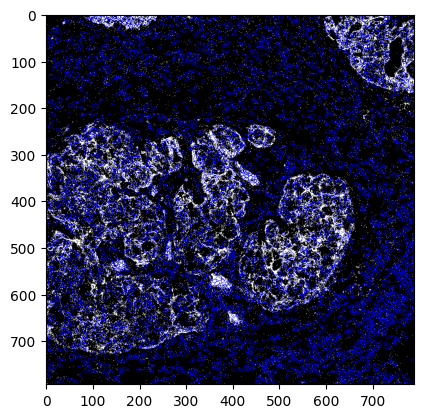

In [16]:
export_outline(img_overlay,  mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


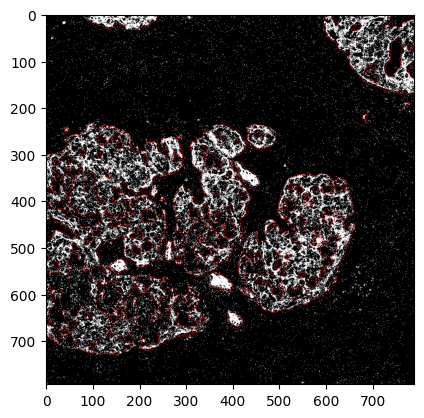

In [42]:
cancer_outline =export_outline(img_overlay,
                               cancer_mask, 
                               color = [255,0,0], 
                               output_file = 'output/cancer_outline.tiff',
                               )
#io.imsave('output/cancer_outline.tiff', cancer_outline)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


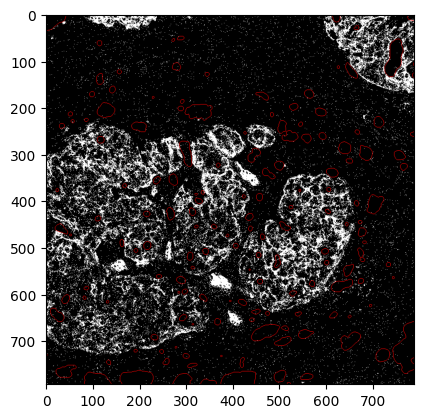

In [18]:
export_outline(img_overlay,tissue_mask, color = [255,0,0])

In [41]:
type(img_overlay)

numpy.ndarray

In [43]:
img_dark = np.zeros_like(img_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


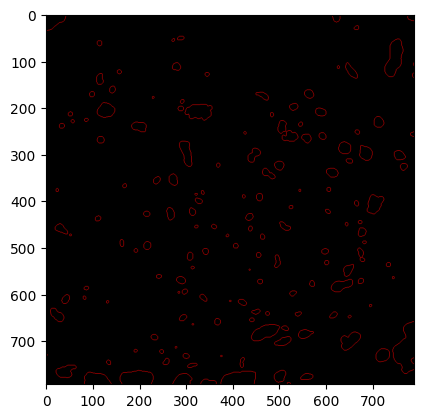

In [44]:
export_outline(img_dark, tissue_mask, color = [255,0,0], output_file = 'output/tissue_outline.tiff')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


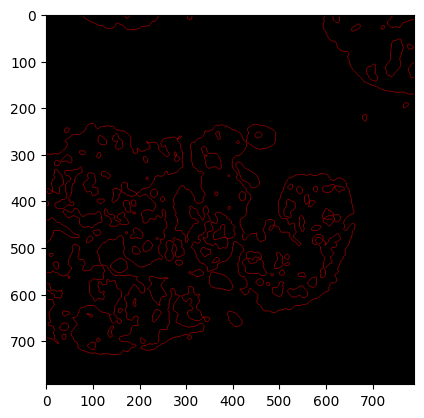

In [45]:
export_outline(img_dark, cancer_mask, color = [255,0,0], output_file = 'output/cancer_outline.tiff')

## Using regionprops

In [6]:
import cv2


In [12]:
labeled_cells = label(cancer_mask)
region_props = regionprops(labeled_cells)

# Create a dictionary to store the parent-child relationships between the regions
region_hierarchy = {}


# Iterate over each region
for i, region_i in enumerate(region_props):
    for j, region_j in enumerate(region_props):
        # Skip if the two regions are the same or if i is not a parent of j
        if i == j or region_i.area >= region_j.area:
            continue
        
        # Check if the bounding box of region_i contains the bounding box of region_j
        if (region_i.bbox[0] <= region_j.bbox[0] and region_i.bbox[1] <= region_j.bbox[1] and
            region_i.bbox[2] >= region_j.bbox[2] and region_i.bbox[3] >= region_j.bbox[3]):
            # Store the parent-child relationship between the regions in the dictionary
            region_hierarchy[i] = j

# Print the parent-child relationships between the regions
for i, j in region_hierarchy.items():
    print(f"Region {i} contains region {j}")

In [13]:
region_hierarchy.items()

dict_items([])

In [7]:
labeled_cells = label(cancer_mask)
region_props = regionprops(labeled_cells)
for i, region_i in enumerate(region_props):
    for j, region_j in enumerate(region_props):
        if i ==j:
            continue
        if (region_i.bbox[0] <= region_j.bbox[0] and region_i.bbox[1] <= region_j.bbox[1] and
            region_i.bbox[2] >= region_j.bbox[2] and region_i.bbox[3] >= region_j.bbox[3]):
            # Store the parent-child relationship between the regions in the dictionary
            #region_hierarchy[i] = j
            print(f"Region {i} contains region {j}")

Region 5 contains region 7
Region 5 contains region 9
Region 5 contains region 10
Region 5 contains region 12
Region 5 contains region 13
Region 5 contains region 16
Region 5 contains region 17
Region 5 contains region 18
Region 5 contains region 21
Region 5 contains region 22
Region 5 contains region 23
Region 5 contains region 24
Region 5 contains region 26
Region 5 contains region 27
Region 5 contains region 28
Region 6 contains region 8
Region 6 contains region 13
Region 6 contains region 14
Region 6 contains region 15
Region 20 contains region 23


In [8]:
# Generate an outline image using the labeled mask
outline_image = segmentation.mark_boundaries(color.gray2rgb(mask), labeled_cells, color=(1, 0, 0), mode='inner')

# Iterate over each labeled region and draw the label number on the outline image
for region in regionprops(labeled_cells):
    # Compute the centroid of the region
    cy, cx = region.centroid

    # Draw the label number on the outline image
    cv2.putText(outline_image, str(region.label), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 1), 2)


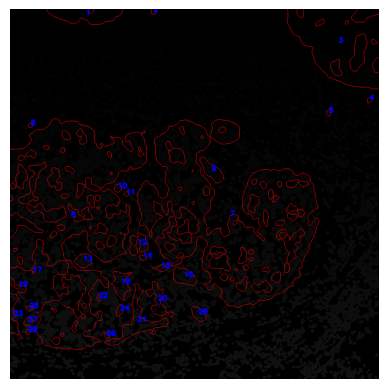

In [10]:
plt.imshow(outline_image)
plt.axis('off')
plt.show()

In [11]:
cv2.imshow("Outline image with label numbers", outline_image)
cv2.waitKey(8000)
cv2.destroyAllWindows()